# Dataset Description 
I got this data from https://covidtracking.com/data/state/massachusetts. This csv file records weekly the number of new tests, number of case, number of hospitalization, and new death .etc. I am interested in these two aspects:
1. Whether positive rate goes up after the New Year in 2021 in MA.
2. Whether the gathering from May to July in 2020 affects positive rate in US. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load csv
format='%Y-%m-%d'
df = pd.read_csv('all-states-history.csv')
df['date'] = pd.to_datetime(df['date'], format=format)

In [3]:
print(df['date'])

0       2021-03-07
1       2021-03-07
2       2021-03-07
3       2021-03-07
4       2021-03-07
           ...    
20775   2020-01-17
20776   2020-01-16
20777   2020-01-15
20778   2020-01-14
20779   2020-01-13
Name: date, Length: 20780, dtype: datetime64[ns]


This dataset stores the data related to COVID from 2020/1/13 till the present.

In [4]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930.000000,9422.000000,20780.000000,7593.000000,12382.000000,12382.000000,17339.000000,20780.000000,3789.000000,11636.000000,...,2.061400e+04,20780.000000,4.789000e+03,3.421000e+03,2200.000000,999.000000,9.197000e+03,2.078000e+04,1.451600e+04,2.078000e+04
mean,3682.216859,3770.182764,24.790712,417.291321,9262.762478,9262.762478,1190.576965,37.360780,1934.191607,359.621176,...,2.186936e+06,17508.388210,1.634028e+05,3.089196e+05,165431.783182,168188.246246,9.650105e+05,2.739554e+03,2.304555e+06,1.296143e+04
std,6281.366321,4157.640633,60.162742,537.625982,12620.544081,12620.544081,2060.041207,208.237151,1953.329983,594.831150,...,4.436508e+06,33586.022461,2.016978e+05,4.232854e+05,178181.836898,143748.073365,1.415215e+06,1.621900e+04,4.445365e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-12257.000000,6.000000,0.000000,...,0.000000e+00,-130545.000000,0.000000e+00,1.000000e+00,1.000000,3.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,161.250000,607.000000,0.000000,79.000000,985.250000,985.250000,166.500000,0.000000,501.000000,60.000000,...,1.040498e+05,1205.750000,1.896500e+04,2.004700e+04,54912.750000,37675.500000,1.414700e+05,0.000000e+00,1.324600e+05,0.000000e+00
50%,1108.000000,2409.500000,6.000000,216.000000,4472.000000,4472.000000,531.000000,0.000000,1295.000000,172.000000,...,6.552670e+05,6125.000000,8.465200e+04,1.233840e+05,103967.500000,144130.000000,4.193720e+05,0.000000e+00,7.316510e+05,1.896500e+03
75%,4387.500000,5462.000000,24.000000,460.000000,12248.500000,12248.500000,1279.000000,36.000000,2451.000000,380.000000,...,2.264766e+06,19086.500000,2.300110e+05,4.327270e+05,183103.000000,255251.000000,1.229298e+06,2.478000e+03,2.496925e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,82237.000000,22851.000000,16373.000000,9263.000000,5225.000000,...,4.964601e+07,473076.000000,1.054711e+06,2.664340e+06,995580.000000,580372.000000,1.124825e+07,8.208170e+05,4.964601e+07,2.164543e+06


In [14]:
df.index

RangeIndex(start=0, stop=20780, step=1)

From the dataset overview, we can see the damage caused by COVID to MA community. Around 24 people die due to COVID every day. 

In [5]:
df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

We can see there is a lot of columns are not shown in df.describe(). Since I want to find out whether Booster lower the positive rate and  the war going on affects the test rate, 

I will focus more on "Date","Positive", "positiveIncrease", "totalTestResults", and "totalTestResultsIncrease"

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.iloc[[0,19,21],]

,percent_missing
date,0.000000
positive,0.904716
positiveIncrease,0.000000


From this chart, we can see more than 90% percent of data is missing in positive but none is missed in positiveIncrease. Let's utilize this.

In [7]:
#make a data frame, ignore irelevent features 
new_df = df[['date','state','positive','positiveIncrease']]
sort_by_state = new_df.sort_values('state')
print(sort_by_state[sort_by_state['state'] == 'AK'].sort_values('date',ascending=True).head(20))
#we can see for AK, data is missing for dates before 2020/3/16

            date state  positive  positiveIncrease
20451 2020-03-06    AK       NaN                 0
20400 2020-03-07    AK       NaN                 0
20349 2020-03-08    AK       NaN                 0
20298 2020-03-09    AK       NaN                 0
20247 2020-03-10    AK       NaN                 0
20196 2020-03-11    AK       NaN                 0
20145 2020-03-12    AK       NaN                 0
20094 2020-03-13    AK       NaN                 0
20043 2020-03-14    AK       NaN                 0
19992 2020-03-15    AK       NaN                 0
19936 2020-03-16    AK       NaN                 0
19880 2020-03-17    AK       3.0                 3
19824 2020-03-18    AK       8.0                 5
19768 2020-03-19    AK      11.0                 3
19712 2020-03-20    AK      14.0                 3
19656 2020-03-21    AK      15.0                 1
19600 2020-03-22    AK      25.0                10
19544 2020-03-23    AK      38.0                13
19488 2020-03-24    AK      42.

Since COVID data collection for most states started in mid of March, to avoid NaN data, I will only focus on data collected after 2020/4.

In [8]:
new_df = df[['date','state','positive','positiveIncrease']]
sort_by_date = new_df.sort_values('date')
sort_by_date.reset_index(drop=True, inplace=True)
sort_by_date[sort_by_date['date'] == '2020-04-01'].index.values[0]
# 2020 April data started in 1684 (index_value)

1684

In [9]:
drop_date = sort_by_date.iloc[1684:,:].sort_values('state').reset_index(drop=True)
percent_missing = drop_date.isnull().sum() * 100 / len(df)
missing_value_drop_date = pd.DataFrame({'percent_missing': percent_missing})
missing_value_drop_date

#NaN value is gone!

,percent_missing
date,0.0
state,0.0
positive,0.0
positiveIncrease,0.0


In [10]:
new_df = drop_date.groupby('state')
new_df.first().head()

,date,positive,positiveIncrease
state,,,
AK,2020-09-18,6658.0,107
AL,2021-01-19,426543.0,2515
AR,2021-02-18,314445.0,253
AS,2020-06-24,0.0,0
AZ,2020-10-13,226734.0,684


In [11]:
#Let's try MA first
MA_df = new_df.get_group('MA').sort_values('date').reset_index(drop=True)
MA_df

,date,state,positive,positiveIncrease
0,2020-04-01,MA,7738.0,1118
1,2020-04-02,MA,8966.0,1228
2,2020-04-03,MA,10402.0,1436
3,2020-04-04,MA,11736.0,1334
4,2020-04-05,MA,12500.0,764
...,...,...,...,...
336,2021-03-03,MA,584743.0,1899
337,2021-03-04,MA,586310.0,1567
338,2021-03-05,MA,588209.0,1899
339,2021-03-06,MA,589931.0,1722


# Whether New Year events increase the positive rate in 2021 in MA
From the graph below, I would like to say Christmas and New Year event both increase the positive rate. After these events, positive rate drop significantly

<AxesSubplot:xlabel='date'>

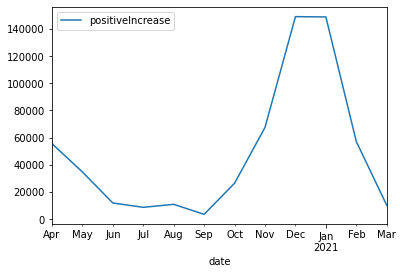

In [12]:
s = MA_df.resample('MS', on='date')['positiveIncrease'].sum().to_frame()
s.plot()

# Whether the gathering in May to July in 2020 affects positive rate in US. 
According to the char, from May to July in 2020, there was no big increase. The gathering did not affect positive rate significantly. 

<AxesSubplot:title={'center':'Positive Increase in U.S in 2020-2021'}, xlabel='Month', ylabel='Positive Increase'>

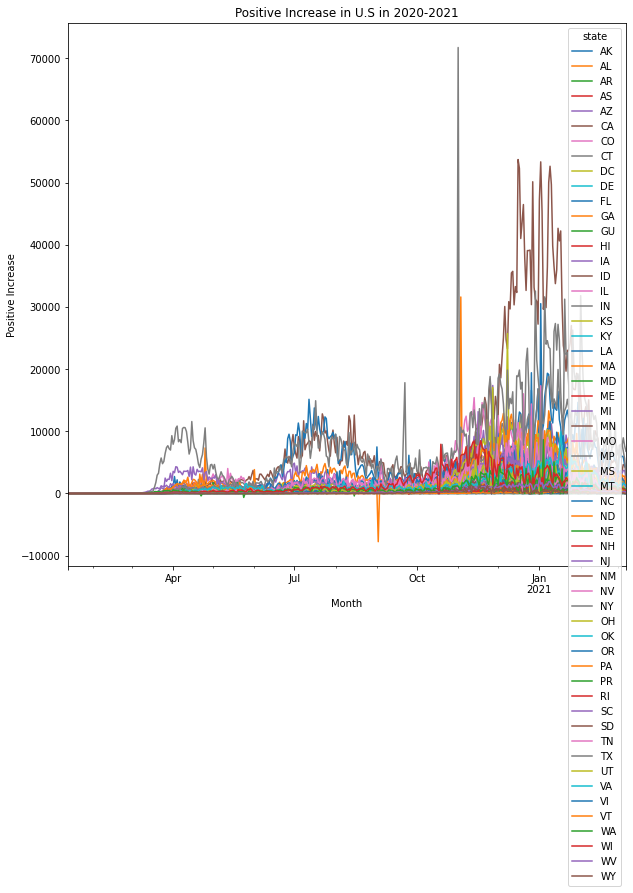

In [17]:
# table_df = df.resample('MS', on='date')['positiveIncrease'].sum().to_frame()
table = pd.pivot_table(df, values='positiveIncrease', index=['date'],
                    columns=['state'], aggfunc=np.sum,fill_value=0)
table.plot(figsize = (10,10),ylabel = 'Positive Increase',xlabel = 'Month',title = 'Positive Increase in U.S in 2020-2021')

# plt.legend(loc="lower left", ncol=len(df.columns),prop={'size': 10})

